In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
import io
data = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [ ]:
features = ['longitude', 'latitude', 'median_income']
select_df = data[features]
select_df.columns

Index(['longitude', 'latitude', 'median_income'], dtype='object')

In [ ]:
X = StandardScaler().fit_transform(select_df)
X[:5]

array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       [-1.33781784,  1.03850269,  0.93296751],
       [-1.33781784,  1.03850269, -0.012881  ]])

In [ ]:
kmeans = KMeans(n_clusters=6) # number of clusters must be specified
model = kmeans.fit(X)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centers = model.cluster_centers_
centers[:5]

array([[-1.19024473,  0.97381708,  0.85176073],
       [ 0.87434164, -0.85018976, -0.57657646],
       [ 0.77146389, -0.82749565,  0.73729619],
       [-0.08049943,  0.23093313, -0.65829299],
       [-1.16155392,  1.27281274, -0.55564488]])

In [ ]:
centers.shape

(6, 3)

In [ ]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [ ]:
# Function that creates Parallel Plots
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
P = pd_centers(features, centers)

In [ ]:
P

,longitude,latitude,median_income,prediction
0,-1.190245,0.973817,0.851761,0
1,0.874342,-0.850190,-0.576576,1
2,0.771464,-0.827496,0.737296,2
3,-0.080499,0.230933,-0.658293,3
4,-1.161554,1.272813,-0.555645,4
5,0.200847,-0.371385,3.434079,5


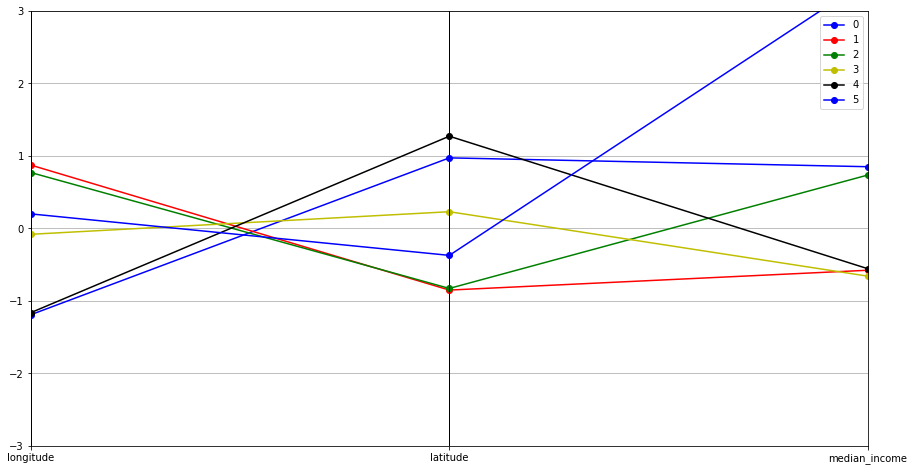

In [ ]:
parallel_plot(P)

In [ ]:
# Create cluster label
data['econ_region'] = kmeans.fit_predict(X)
data['econ_region'] = data['econ_region'].astype("category")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


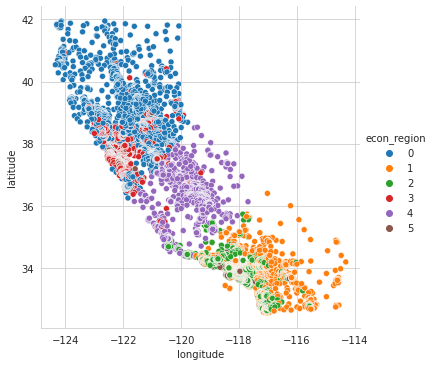

In [ ]:
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=data, kind='scatter');

In [ ]:
median_attributes = ['econ_region', 'median_house_value', 'median_income', 'housing_median_age']
income_house = data[median_attributes]
income_house.groupby(['econ_region']).describe()

median_house_value                                ... housing_median_age            
                         count           mean            std  ...                50%   75%   max
econ_region                                                   ...                               
0                       4896.0  157229.154208   87306.994207  ...               30.0  42.0  52.0
1                       6661.0  173059.686984   81771.210067  ...               31.0  38.0  52.0
2                       4131.0  273574.212297  102628.883068  ...               26.0  35.0  52.0
3                       2746.0  286810.774581  103472.402555  ...               26.0  36.0  52.0
4                       1659.0  105011.334539   68982.145147  ...               25.0  34.0  52.0
5                        547.0  466230.868373   68900.730672  ...               26.0  37.0  52.0

[6 rows x 24 columns]